In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('https://query.data.world/s/dgyj35citerdqk36rou52lgmfhfity',header=None)
df.columns = ['Class label', 'Alcohol','Malic acid', 'Ash','Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines','Proline']
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [7]:
forest = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=-1)

In [8]:
forest.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [10]:
feature_importance = forest.feature_importances_

In [19]:
feature_importance_idx = np.argsort(feature_importance)[::-1]

In [20]:
feature_importance_idx

array([12,  9,  6,  0, 11, 10,  5,  1,  4,  3,  8,  2,  7], dtype=int32)

In [47]:
range(X.shape[1])

range(0, 13)

In [51]:
for i in range(X.shape[1]):
    print("%2d) %-*s %f" % (i + 1, 50,df.columns[feature_importance_idx[i]+1],feature_importance[feature_importance_idx[i]]))

 1) Proline                                            0.170382
 2) Color intensity                                    0.161090
 3) Flavanoids                                         0.156746
 4) Alcohol                                            0.124662
 5) OD280/OD315 of diluted wines                       0.119329
 6) Hue                                                0.078430
 7) Total phenols                                      0.051930
 8) Malic acid                                         0.031375
 9) Magnesium                                          0.029662
10) Alcalinity of ash                                  0.028033
11) Proanthocyanins                                    0.023859
12) Ash                                                0.013186
13) Nonflavanoid phenols                               0.011317


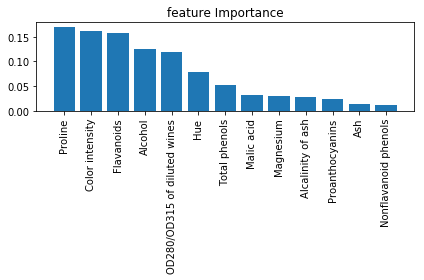

In [35]:
plt.bar(range(X.shape[1]),feature_importance[feature_importance_idx])
plt.title('feature Importance')
plt.xticks(range(X.shape[1]),df.columns[feature_importance_idx+1],rotation=90)
plt.tight_layout()
plt.show()

In [52]:
feature_importance

array([ 0.12466193,  0.03137509,  0.01318579,  0.02803328,  0.02966205,
        0.05192959,  0.15674607,  0.0113166 ,  0.0238591 ,  0.16109002,
        0.07842982,  0.11932882,  0.17038184])

In [53]:
df.columns[1:]

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')